# sum of squares vs. squares of sums

This notebook explores the odd behavior we see when we optimize with MSE with cumulated/deaggregated observations.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scpo

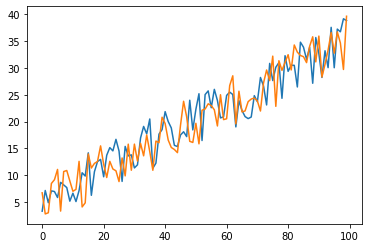

In [31]:
# real data

def randNoise(len, mid, range):
    return range * np.random.rand(100) - mid * np.ones(100)

L = 100
x = np.arange(L)
alpha = 0.3
y1 = alpha * x + randNoise(L, 0, 10)
y2 = alpha * x + randNoise(L, 0, 10)
ys = np.zeros((2, L))
ys[0, :] = y1
ys[1, :] = y2
y_cuml = np.sum(ys, axis=0)

plt.plot(x, y1)
plt.plot(x, y2)

In [19]:
def mse(y_obs, y_sim):
    err = y_obs - y_sim
    return np.mean(err * err)


In [20]:
def minimize(y_obs, model, firstGuess, bounds):
    def target(para):
        y_sim = model(para)
        return mse(y_obs, y_sim)
    return scpo.minimize(target, x0=firstGuess, bounds=bounds)

In [23]:
def linModel(a):
    return a * x

In [32]:
minimize(y_cuml, linModel, [0.1], [(0.0001, 1.0000)])

      fun: 44.418928128855526
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.10542736e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.76427037])

In [34]:
minimize(ys, linModel, [0.1], [(0.0001, 1.0000)])

      fun: 14.721232631235104
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.43360887e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 2
   status: 0
  success: True
        x: array([0.38213518])